In [158]:
#importing all the required libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [159]:
#Loading the dataset
data = load_breast_cancer().data
target = load_breast_cancer().target

In [160]:
data.shape

(569, 30)

In [161]:
#https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array
np.unique(target,return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [162]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

In [163]:
#Standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Custom Implementation

In [164]:
#Implementing logistic regression
w_current=np.zeros(30)
w_temp=np.zeros(30)

n_iter=50
reg=0.01   # regularization parameter lambda
r=0.1      # learning rate
sample_size=20    # sample size for SGD
N=X_train.shape[0]

for j in range(n_iter):
    idx=np.random.randint(X_train.shape[0],size=sample_size)
    w_temp=np.zeros(30)
    for i in (idx):
        w_temp=w_temp+((X_train[i]*(y_train[i]-(1/(1+np.exp(-1*(np.dot(w_current,X_train[i])))))))/sample_size)
    w_current=(1-(r*reg/N))*w_current + r*w_temp
    
    


In [165]:
#weights generated by custom log reg implementation
w_current

array([-0.30343366, -0.28710242, -0.30594136, -0.28841459, -0.14106664,
       -0.16340933, -0.24829374, -0.31608013, -0.12327547,  0.14185837,
       -0.24736108,  0.01278758, -0.23559358, -0.22133956,  0.0331675 ,
        0.00930552,  0.08314054, -0.04109298,  0.00716239,  0.17340986,
       -0.35274642, -0.3297977 , -0.35289548, -0.32077154, -0.25695893,
       -0.23916579, -0.28242792, -0.33493902, -0.24651813, -0.10835037])

In [166]:
def predict(x,w):
    y_pred=[]
    for i in range(len(x)):
        y = (np.asscalar(1/(1+np.exp(-(np.dot(w,x[i]))))))
        if y<0.5:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return np.array(y_pred)

In [167]:
#Getting predictions for test datapoints
y_pred = predict(X_test,w_current)


In [168]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([ 64, 124], dtype=int64))

In [169]:
#prediction using custom LR
np.unique(y_pred,return_counts=True)

(array([0, 1]), array([ 68, 120], dtype=int64))

In [170]:
#Function to calulate TPR,FPR,TNR and FNR to be included in confusion matrix
def find_rates(mat):
    mat2=[]
    mat2.append((mat[0,0]))
    mat2.append((mat[1,0]))
    mat2.append((mat[0,1]))
    mat2.append((mat[1,1]))
    mat2=np.reshape(mat2,(2,2))
    mat2 = pd.DataFrame(mat2,columns=[0,1],index=[0,1])
    mat2.index.name = 'Predicted'
    mat2.columns.name = 'Actual'
    return mat2

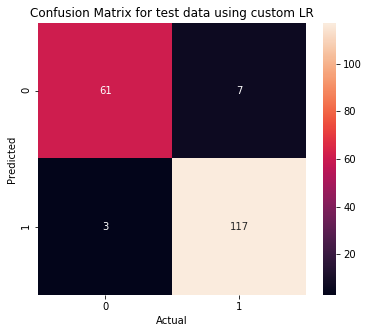

In [171]:
mat_test = find_rates(confusion_matrix(y_test, y_pred))

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for test data using custom LR')
sns.heatmap(mat_test,annot=True,fmt='g')

In [172]:
# tn, fp, fn, tp  rates for custom LR implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(61, 3, 7, 117)

### Sklearn Implementation

In [173]:
#Logistic regression using sklearn
LRclf = LogisticRegression(C=0.1)
LRclf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [174]:
y_pred_sklearn = LRclf.predict(X_test)

In [175]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([ 64, 124], dtype=int64))

In [176]:
np.unique(y_pred_sklearn,return_counts=True)

(array([0, 1]), array([ 62, 126], dtype=int64))

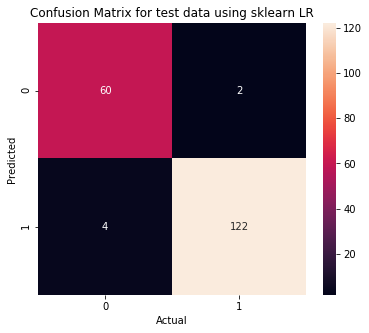

In [177]:
mat_test = find_rates(confusion_matrix(y_test, y_pred_sklearn))

fig=plt.figure(figsize=(6,5))
plt.title('Confusion Matrix for test data using sklearn LR')
sns.heatmap(mat_test,annot=True,fmt='g')

In [178]:
# tn, fp, fn, tp  rates for custom LR implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sklearn).ravel()
(tn, fp, fn, tp)

(60, 4, 2, 122)

In [179]:
from prettytable import PrettyTable
p = PrettyTable()
p.title='Weights from both models'
p.field_names=['SKlearn','Custom','Difference']
for i in range(29):
    p.add_row([LRclf.coef_[0,i],w_current[i],LRclf.coef_[0,i]-w_current[i]])
print(p)

+----------------------+-----------------------+------------------------+
|       SKlearn        |         Custom        |       Difference       |
+----------------------+-----------------------+------------------------+
| -0.3279928403946176  |  -0.3034336552650718  | -0.024559185129545802  |
| -0.4044681847630363  |  -0.2871024245470781  |  -0.11736576021595824  |
| -0.3264177174573041  |  -0.30594136375482756 | -0.020476353702476524  |
| -0.34022968423323857 |  -0.28841459479942855 | -0.051815089433810024  |
| -0.08879695242121328 |  -0.1410666419372781  |  0.052269689516064824  |
| 0.023184824208956258 |  -0.1634093295360416  |  0.18659415374499785   |
| -0.3433012022904838  |  -0.24829374314509173 |  -0.09500745914539205  |
| -0.3614639908424713  |  -0.31608012554371245 | -0.045383865298758874  |
| -0.12795879975383287 |   -0.123275467763592  | -0.004683331990240874  |
| 0.21647597209253816  |  0.14185837323388553  |  0.07461759885865263   |
| -0.4261972157288296  |  -0.247361082

### Observations
1. The weights generated by custom implementation and sklearn implementation are almost similar
2. Also the custom implementation seems to predict the classes almost accurately